<a href="https://colab.research.google.com/github/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/Collaborative_Filtering_AllModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Collaborative Filtering?

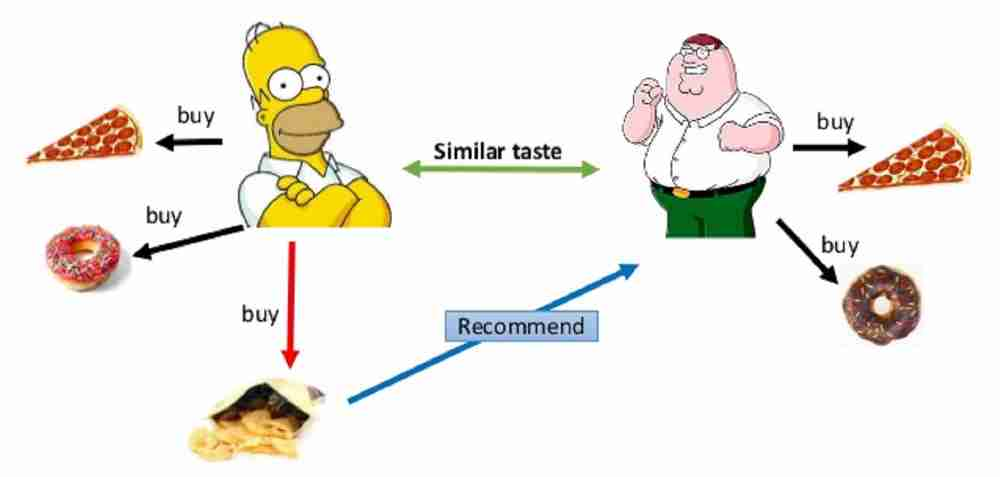

In [ ]:
Image('intro.jpeg')

Collaborative filtering is the predictive process behind recommendation engines. Recommendation engines analyze information about users with similar tastes to assess the probability that a target individual will enjoy something.

Collaborative filtering uses algorithms to filter data from user reviews to make personalized recommendations for users with similar preferences. Collaborative filtering is also used to select content and advertising for individuals on social media.

Collaborative filtering filters information by using the interactions and data collected by the system from other users. For example when we want to find a new movie to watch we'll often ask our friends for recommendations.

Naturally, we have greater trust in the recommendations from friends who share tastes similar to our own. Collaborative filtering does the same job. Collaborative filtering mostly focuses on finding similarity between users and recommend each other their likes. There are various ways to find the similarity measure : Cosine similarity, Pearson similarity, Jaccard similarity etc.

# Importing required libraries

In [ ]:
# Installing surprise Library
!pip install scikit-surprise

In [ ]:
# Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from IPython.display import Image

# Importing scipy.sparse.csr_matrix for kNN data preparation
from scipy.sparse import csr_matrix

# Importing kNN algorithm
from sklearn.neighbors import NearestNeighbors

# Importing cosine_similarity to calculate cosine similarity in memory based collaborative filtering
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Importing surprise.Reader,Dataset for surprise data preparation
from surprise import Reader, Dataset

# Importing for surprise model customizations
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV

In [ ]:
# Importing algorithms from Surprise package
from surprise.prediction_algorithms import CoClustering
from surprise.prediction_algorithms import NMF

# Importing accuracy to get metrics such as RMSE and MAE
from surprise import accuracy

# Importing the dataset as df

In [ ]:
df = pd.read_excel('Rec_sys_data.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850
1,536365,71053,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.21,ExpressAir,30.12,17850
2,536365,21730,6,2010-12-01 08:26:00,2010-12-03 08:26:00,0.56,Regular Air,15.22,17850
3,536365,84406B,8,2010-12-01 08:26:00,2010-12-03 08:26:00,0.30,Regular Air,15.22,17850
4,536365,22752,2,2010-12-01 08:26:00,2010-12-04 08:26:00,0.57,Delivery Truck,5.81,17850


## About the Dataset

The 8 columns or features are as:
1. InvoiceNo : The invoice number of particular transaction
2. StockCode : The unique code for particular item
3. Descripion : The description of particular item
4. Quantity : The quantity of particular item bought by the customer
5. InvoiceDate : The date and time when the transaction was made
6. UnitPrice : The price of 1 unit of particular item
7. CustomerID : The unique id of customer who bought the item
8. Country : The country or region of the customer

In [ ]:
df.shape

(272404, 9)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

InvoiceNo       0
StockCode       0
Quantity        0
InvoiceDate     0
DeliveryDate    0
Discount%       0
ShipMode        0
ShippingCost    0
CustomerID      0
dtype: int64

In [ ]:
df1 = df.dropna()

In [ ]:
df1.describe()

,InvoiceNo,Quantity,Discount%,ShippingCost,CustomerID
count,272404.000000,272404.000000,272404.000000,272404.000000,272404.000000
mean,553740.733319,13.579536,0.300092,17.053491,15284.323523
std,9778.082879,149.136756,0.176023,10.013210,1714.478624
min,536365.000000,1.000000,0.000000,5.810000,12346.000000
25%,545312.000000,2.000000,0.150000,5.810000,13893.000000
50%,553902.000000,6.000000,0.300000,15.220000,15157.000000
75%,562457.000000,12.000000,0.450000,30.120000,16788.000000
max,569629.000000,74215.000000,0.600000,30.120000,18287.000000


In [ ]:
df1 = df1[df1.Quantity > 0]

In [ ]:
df1.describe()

,InvoiceNo,Quantity,Discount%,ShippingCost,CustomerID
count,272404.000000,272404.000000,272404.000000,272404.000000,272404.000000
mean,553740.733319,13.579536,0.300092,17.053491,15284.323523
std,9778.082879,149.136756,0.176023,10.013210,1714.478624
min,536365.000000,1.000000,0.000000,5.810000,12346.000000
25%,545312.000000,2.000000,0.150000,5.810000,13893.000000
50%,553902.000000,6.000000,0.300000,15.220000,15157.000000
75%,562457.000000,12.000000,0.450000,30.120000,16788.000000
max,569629.000000,74215.000000,0.600000,30.120000,18287.000000


In [ ]:
df1.shape

(272404, 9)

# Memory-Based Approach

In Memory-Based approach, the closest user or items are calculated only by using Cosine similarity or Pearson correlation coefficients, which are only based on arithmetic operations.

A common distance metric is cosine similarity. The metric can be thought of geometrically if one treats a given user’s (item’s) row (column) of the ratings matrix as a vector. For user-based collaborative filtering, two users’ similarity is measured as the cosine of the angle between the two users’ vectors. For users u and u′, the cosine similarity is:



As no training or optimization is involved, it is an easy to use approach. But its performance decreases when we have sparse data which hinders scalability of this approach for most of the real-world problems.

Memory-Based approach is further divided into :
1. User-to-User Collaborative Filtering
2. Item-to-Item Collaborative Filtering

## User-to-User Collaborative Filtering

User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user.

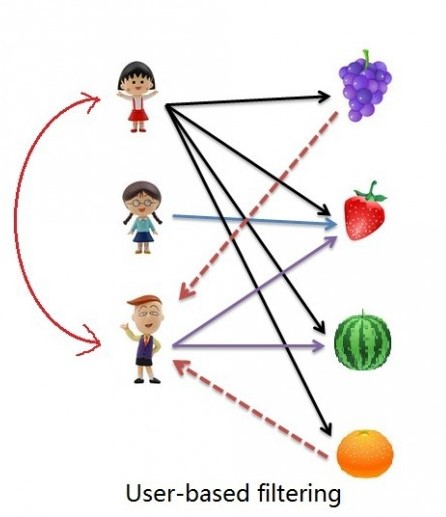

In [ ]:
Image('User_based1.jpeg')

In User-Based Collaborative Filtering, we create a matrix that describes behaviour of all users corresponding to all the items.
Further, we build relation between mutiple users to identify the similar users.

### Implementation

We are creating a df(matrix) which contains CustomerID and whether they have ever purchased a product using groupby.

In [ ]:
purchase = (df1.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID'))

In [ ]:
purchase.head(30)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214R,90214S,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0
12353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0


We are getting the quantity ordered (example : 48,24,126) while we just want to know if that particular item is purchased or not. 

Thus we need to do encoding as 1(if purchased) or 0(not purchased)


In [ ]:
def encode_units(x):
    if x < 1: # If the quantity is less than 1
        return 0 # Not purchased
    if x >= 1: # If the quantity is greater than 1
        return 1 # Purchased


purchase = purchase.applymap(encode_units)

In [ ]:
purchase.head(30)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214R,90214S,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


The purchase matrix is now ready, which describes the behaviour of Customers corresponding to all the items.

We can now apply Collaborative filtering on it.

In [ ]:
# Applying cosine_similarity on the purchase matrix
user_similarity = cosine_similarity(purchase)

In [ ]:
# Storing the similarity scores in a dataframe
user_similarity_df = pd.DataFrame(user_similarity,index=purchase.index,columns=purchase.index)

In [ ]:
user_similarity_df

CustomerID,12346,12347,12348,12350,12352,12353,12354,12355,12356,12358,...,18269,18270,18272,18273,18278,18280,18281,18282,18283,18287
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.114708,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
12347,0.0,1.000000,0.070632,0.053567,0.048324,0.0,0.029001,0.091885,0.075845,0.000000,...,0.041739,0.000000,0.050669,0.0,0.036811,0.069843,0.000000,0.0,0.087667,0.021253
12348,0.0,0.070632,1.000000,0.051709,0.031099,0.0,0.027995,0.118262,0.146427,0.061546,...,0.000000,0.000000,0.024456,0.0,0.000000,0.000000,0.000000,0.0,0.123091,0.082061
12350,0.0,0.053567,0.051709,1.000000,0.035377,0.0,0.000000,0.000000,0.033315,0.070014,...,0.000000,0.000000,0.027821,0.0,0.000000,0.000000,0.000000,0.0,0.052511,0.000000
12352,0.0,0.048324,0.031099,0.035377,1.000000,0.0,0.095765,0.040456,0.100180,0.084215,...,0.110264,0.065233,0.133855,0.0,0.000000,0.000000,0.000000,0.0,0.094742,0.056143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,0.0,0.069843,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.105409,1.000000,0.119523,0.0,0.000000,0.000000
18281,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.119523,1.000000,0.0,0.054554,0.000000
18282,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.043355,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000


This is how the user_similarity_df looks like. It contains the similarity score of users with 0 being the least similar while 1 being the most similar.

#### Making Recommendations

In [ ]:
def similar_users(user_id,k=5):
    # separating df rows for the entered user id
    user = user_similarity_df[user_similarity_df.index == user_id]
    
    # a df of all other users
    other_users = user_similarity_df[user_similarity_df.index != user_id]
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(),reverse=True)
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    print('The users with behaviour similar to that of user {0} are:'.format(user_id))
    return users

In [ ]:
simu = similar_users(12347)

simu

The users with behaviour similar to that of user 12347 are:


[18287, 18283, 18282, 18281, 18280]

Further the similar users can be stored in a list and later we can display the items purchased by the similar users as done below

In [ ]:
def simu_recommendation(userid):
    
    simu = similar_users(userid)

    #obtaining all the items bought by similar users
    simu_rec = []
    for j in simu:
        desc = df1[df1["CustomerID"]==j]['StockCode'].to_list()
        simu_rec.append(desc)
    
    #this gives us multi-dimensional list
    # we need to flatten it
    flat_list = []
    for sublist in simu_rec:
        for item in sublist:
            flat_list.append(item)
    final_list = list(dict.fromkeys(flat_list))
    
    # storing 10 random recommendations in a list
    ten_recs = random.sample(final_list, 10)
    
    print('Items bought by Similar users based on Cosine Similarity')
    
    #returning 10 random recommendations
    return ten_recs

In [ ]:
simu_recommendation(12347)

The users with behaviour similar to that of user 12347 are:
Items bought by Similar users based on Cosine Similarity


[22356, 22077, 22551, 20676, 23199, 21175, '47559B', 82581, 22962, '85039A']

## Item-to-Item Collaborative Filtering

An item-to-item filtering process uses a matrix to determine the likeness of pairs of items. Item-to-item processes then compare the current user’s preference to the items in the matrix for similarities upon which to base recommendations.

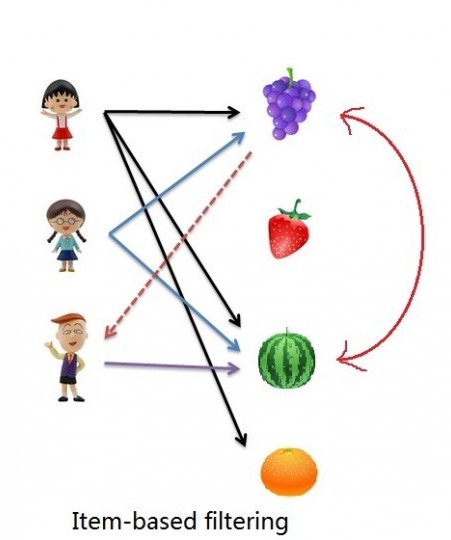

In [ ]:
Image('Item_based.jpeg')

### Implementation

We are creating a df(matrix) which contains item names and whether they have been ever purchased by a customer using groupby.

In [ ]:
items_purchase = (df1.groupby(['StockCode','CustomerID'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('StockCode'))

In [ ]:
items_purchase.head(30)

CustomerID,12346,12347,12348,12350,12352,12353,12354,12355,12356,12358,...,18269,18270,18272,18273,18278,18280,18281,18282,18283,18287
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are getting the quantity ordered (example : 48,24,126) while we just want to know if that particular item is purchased or not. 

Thus we need to do encoding as 1(if purchased) or 0(not purchased)

In [ ]:
items_purchase = items_purchase.applymap(encode_units)

The item_purchase matrix is now ready, which describes if the item was purchased by particular customer or not.

We can now apply Collaborative filtering on it.

In [ ]:
# Applying Cosine similarity on the items
item_similarity = cosine_similarity(items_purchase)

In [ ]:
# Storing the similarity scores in a dataframe
item_similarity_df = pd.DataFrame(item_similarity,index=items_purchase.index,columns=items_purchase.index)

In [ ]:
item_similarity_df.head(10)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214R,90214S,90214V,90214Y,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.108821,0.094281,0.062932,0.091902,0.110096,0.059761,0.083771,0.096449,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.032275,0.000000,0.079333,0.000000,0.066986
10080,0.000000,1.000000,0.000000,0.043033,0.028724,0.067116,0.000000,0.000000,0.076472,0.044023,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10120,0.108821,0.000000,1.000000,0.068399,0.068483,0.026669,0.079872,0.086711,0.121547,0.034986,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076739,0.000000,0.013885
10125,0.094281,0.043033,0.068399,1.000000,0.044499,0.051988,0.051900,0.000000,0.039490,0.034100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074796,0.000000,0.063155
10133,0.062932,0.028724,0.068483,0.044499,1.000000,0.266043,0.051964,0.075218,0.079078,0.053110,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.040622,0.000000,0.066567,0.049752,0.024089
10135,0.091902,0.067116,0.026669,0.051988,0.266043,1.000000,0.080944,0.043937,0.046192,0.044319,...,0.116248,0.116248,0.116248,0.116248,0.047458,0.023729,0.116248,0.068048,0.000000,0.028143
11001,0.110096,0.000000,0.079872,0.051900,0.051964,0.080944,1.000000,0.065795,0.092229,0.092913,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.071067,0.174078,0.116457,0.000000,0.052678
15030,0.059761,0.000000,0.086711,0.000000,0.075218,0.043937,0.065795,1.000000,0.050063,0.086459,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094821,0.000000,0.022875
15034,0.083771,0.076472,0.121547,0.039490,0.079078,0.046192,0.092229,0.050063,1.000000,0.232288,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055381,0.000000,0.032066


#### Making Recommendations

In [ ]:
def similar_items(item,k=10):
    # separating df rows of the selected item
    item = item_similarity_df[item_similarity_df.index == item]
    
    # a df of all other items
    other_items = item_similarity_df
    
    # calc cosine similarity between selected item with other items
    similarities = cosine_similarity(item,other_items)[0].tolist()
    
    # create list of indices of these items
    indices = other_items.index.tolist()
    
    # create key/values pairs of item index and their similarity
    index_similarity = dict(zip(indices, similarities))
    index_similarity = list(index_similarity.keys())

    # grab k items from the top
    top_item_similarities = index_similarity[:k]

    print('Similar items based on purchase behaviour (item-to-item collaborative filtering)')
    return top_item_similarities

In [ ]:
similar_items(22966)

Similar items based on purchase behaviour (item-to-item collaborative filtering)


[10002, 10080, 10120, 10125, 10133, 10135, 11001, 15030, 15034, 15036]

# Model Based Approach

In this approach, Collaborative Filtering models are created using machine learning algorithms to predict if the user is likely to purchase an item or not based on their past behaviour.

The possible approaches can be:
1. KNN : Collaborative Filtering Using k-Nearest Neighbors (kNN) kNN is a machine learning algorithm to find clusters of similar users based on past behaviour, and make predictions using the average of top-k nearest neighbors.
2. Matrix Factorization (MF): The idea behind such models is that attitudes or preferences of a user can be determined by a small number of hidden factors. We can call these factors as Embeddings.

## Collaborative Filtering using k-Nearest Neighbors

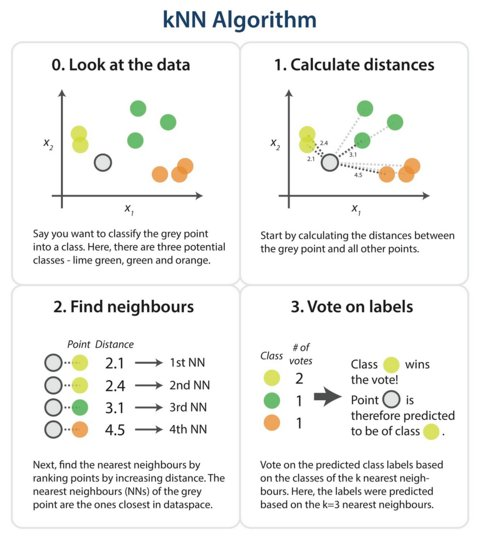

In [ ]:
Image("knn.jpg")

For passing our sparse matrix into KNN we need to convert it into CSR

CSR divides a sparse matrix into 3 arrays : values, extent of rows, index of columns

### Model building

In [ ]:
purchase_matrix = csr_matrix(purchase.values)

# Creating KNN Model with metric parameter as euclidean distance
model_knn = NearestNeighbors(metric = 'euclidean', algorithm = 'brute')

# Fitting the model on purchase_matrix
model_knn.fit(purchase_matrix)

NearestNeighbors(algorithm='brute', metric='euclidean')

### Finding similar users

In [ ]:
# Creating empty list where we will store user id of similar users
simu_knn = []

In [ ]:
def similar_users_knn(purchase,query_index):
    
    # Storing the distance and index of nearest neighors
    distances, indices = model_knn.kneighbors(purchase.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 5)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(purchase.index[query_index]))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, purchase.index[indices.flatten()[i]], distances.flatten()[i]))
            simu_knn.append(purchase.index[indices.flatten()[i]])    

In [ ]:
similar_users_knn(purchase,1497)

Recommendations for 14729:

1: 16917, with distance of 8.12403840463596:
2: 16989, with distance of 8.12403840463596:
3: 15124, with distance of 8.12403840463596:
4: 12897, with distance of 8.246211251235321:


In [ ]:
simu_knn

[16917, 16989, 15124, 12897]

### Making Recommendations

In [ ]:
def simu_recommendation_knn(simu_knn):
    

    #obtaining all the items bought by similar users
    simu_rec = []
    for j in simu_knn:
        desc = df1[df1["CustomerID"]==j]['StockCode'].to_list()
        simu_rec.append(desc)
    
    #this gives us multi-dimensional list
    # we need to flatten it
    flat_list = []
    for sublist in simu_rec:
        for item in sublist:
            flat_list.append(item)
    final_list = list(dict.fromkeys(flat_list))
    
    # storing 10 random recommendations in a list
    ten_recs = random.sample(final_list, 10)
    
    print('Items bought by Similar users based on KNN')
    
    #returning 10 random recommendations
    return ten_recs

In [ ]:
simu_recommendation_knn(simu_knn)

Items bought by Similar users based on KNN


[22957, 84978, 22917, '84997A', 22470, 22469, 22501, 22916, 22920, 22926]

## Collaborative Filtering using Matrix Factorization

For Matrix Factorization, we are using the Surprise Package.

Surprise package: This package has been specially developed to make recommendation based on collaborative filtering easy. It has default implementation for a variety of Collaborative Filtering algorithms such as NMF, kNN, Co-Clustering, SVD.

In [ ]:
df3 = items_purchase.stack().to_frame()

In [ ]:
df3.reset_index(inplace=True)

In [ ]:
df3

,StockCode,CustomerID,0
0,10002,12346,0
1,10002,12347,0
2,10002,12348,0
3,10002,12350,0
4,10002,12352,0
...,...,...,...
12903081,POST,18280,0
12903082,POST,18281,0
12903083,POST,18282,0
12903084,POST,18283,0


3877 unique items x 4339 unique customer ids

Total records in df3 should be 3877x4339 = 1,68,22,303

And this size is too big to pass into an algorithm so we need to reduce the size of dataset by shortlisting.

### Shortlisting customers & items based on no. of orders

In [ ]:
# Storing all customer ids in customers
customers = df['CustomerID']

# Storing all item descriptions in items
items = df['StockCode']

In [ ]:
from collections import Counter

In [ ]:
# counting no. of orders made by each customer
count1 = Counter(customers)

# storing the count and customer id in a dataframe
countdf1 = pd.DataFrame.from_dict(count1, orient='index').reset_index()

# dropping all customer ids with less than 120 orders
countdf1 = countdf1[countdf1[0]>120]

# renaming the index column as CustomerID for inner join
countdf1.rename(columns={'index':'CustomerID'},inplace=True)

In [ ]:
countdf1

,CustomerID,0
0,17850,297
1,13047,140
2,12583,182
6,14688,265
8,15311,1892
...,...,...
3308,14096,1170
3367,16910,261
3392,16360,226
3413,17728,133


In [ ]:
# counting no. of times an item was ordered
count2 = Counter(items)

# storing the count and item description in a dataframe
countdf2 = pd.DataFrame.from_dict(count2, orient='index').reset_index()

# dropping all items which were ordered less than 120 times
countdf2 = countdf2[countdf2[0]>120]

# renaming the index column as Description for inner join
countdf2.rename(columns={'index':'StockCode'},inplace=True)

In [ ]:
countdf2

,StockCode,0
0,84029E,161
1,71053,220
3,84406B,213
4,22752,229
5,85123A,1606
...,...,...
3295,23294,181
3296,23295,213
3363,23328,129
3373,23356,148


Applying inner join

In [ ]:
df4 = pd.merge(df3, countdf2, on='StockCode', how='inner')
df4 = pd.merge(df4, countdf1, on='CustomerID', how='inner')

In [ ]:
df4

,StockCode,CustomerID,0_x,0_y,0
0,10133,12347,0,124,124
1,15036,12347,0,278,124
2,17003,12347,0,138,124
3,20675,12347,0,188,124
4,20676,12347,0,242,124
...,...,...,...,...,...
385667,85099F,18283,1,540,447
385668,85123A,18283,1,1606,447
385669,85132C,18283,0,127,447
385670,M,18283,1,198,447


In [ ]:
# dropping columns which are not necessary
df4.drop(['0_y','0_x'],axis=1,inplace=True)

In [ ]:
df4

,StockCode,CustomerID,0
0,10133,12347,124
1,15036,12347,124
2,17003,12347,124
3,20675,12347,124
4,20676,12347,124
...,...,...,...
385667,85099F,18283,447
385668,85123A,18283,447
385669,85132C,18283,447
385670,M,18283,447


In [ ]:
df4.describe()

,CustomerID,0
count,385672.000000,385672.000000
mean,15360.985915,279.089789
std,1719.468125,337.879413
min,12347.000000,121.000000
25%,13996.250000,151.000000
50%,15413.000000,198.000000
75%,16840.000000,290.000000
max,18283.000000,5095.000000


This is how the df4 looks like. We have reduced the size from 1,68,22,303 to 3,85,672.

This format is exactly what is suitable to be passed into surprise library.

In [ ]:
# reading the data in a format supported by surprise library.
reader = Reader(rating_scale=(0,5946))
# the range has been set as 0,5946 as the maximum value of quantity is 5946.

# loading Dataset in a format supported by surprise library.
data = Dataset.load_from_df(df4, reader)

In [ ]:
# performing train test split on the dataset
trainset, testset = train_test_split(data, test_size= 0.2)

### Implementing NMF

In [ ]:
algo1 = NMF()

algo1.fit(trainset)

pred1 = algo1.test(testset)

In [ ]:
accuracy.rmse(pred1)

accuracy.mae(pred1)

RMSE: 439.3857
MAE:  274.5963


274.5963194826919

In [ ]:
cross_validate(algo1, data, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    437.1302429.6678424.6529425.1571424.0405428.12974.9198  
MAE (testset)     273.9500273.4213271.7194272.7447271.4452272.65610.9603  
Fit time          23.06   23.17   23.44   23.15   23.21   23.21   0.13    
Test time         0.69    0.70    0.81    0.67    0.67    0.71    0.05    


{'test_rmse': array([437.13024409, 429.66776174, 424.65290583, 425.15709582,
        424.04045056]),
 'test_mae': array([273.94997832, 273.42128006, 271.71936714, 272.74472902,
        271.44517019]),
 'fit_time': (23.058589935302734,
  23.166386127471924,
  23.44352149963379,
  23.150835752487183,
  23.213282346725464),
 'test_time': (0.6873729228973389,
  0.7029964923858643,
  0.8122737407684326,
  0.6716861724853516,
  0.6717195510864258)}

### Implementing Co-Clustering

In [ ]:
algo = CoClustering()

algo.fit(trainset)

pred = algo.test(testset)

In [ ]:
accuracy.rmse(pred)

accuracy.mae(pred)

RMSE: 7.4619
MAE:  6.0173


6.017295584676783

In [ ]:
cross_validate(algo, data, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    7.3103  7.3056  7.0772  7.1445  6.9577  7.1591  0.1355  
MAE (testset)     5.9515  5.8698  5.6886  5.8151  5.6591  5.7968  0.1098  
Fit time          9.02    8.94    9.06    9.04    9.12    9.04    0.06    
Test time         0.62    0.62    0.48    0.48    0.64    0.57    0.07    


{'test_rmse': array([7.31028705, 7.30564277, 7.07722629, 7.14453879, 6.95765272]),
 'test_mae': array([5.95145029, 5.86979031, 5.68855368, 5.81509646, 5.65908868]),
 'fit_time': (9.016186714172363,
  8.935364723205566,
  9.058266162872314,
  9.044747352600098,
  9.122852087020874),
 'test_time': (0.6248557567596436,
  0.6248533725738525,
  0.48426032066345215,
  0.48426365852355957,
  0.6404359340667725)}

### Giving out predictions

In [ ]:
pred1

# Predictions given out by NMF

[Prediction(uid=22441, iid=14546, r_ui=269.0, est=6.130195333342902, details={'was_impossible': False}),
 Prediction(uid=22670, iid=17191, r_ui=182.0, est=4.319962152147603, details={'was_impossible': False}),
 Prediction(uid=85053, iid=16059, r_ui=180.0, est=4.2004329642870015, details={'was_impossible': False}),
 Prediction(uid=22557, iid=14936, r_ui=300.0, est=6.671403958656839, details={'was_impossible': False}),
 Prediction(uid=21213, iid=12731, r_ui=236.0, est=5.775874352224644, details={'was_impossible': False}),
 Prediction(uid=84949, iid=16520, r_ui=156.0, est=3.5808972895429063, details={'was_impossible': False}),
 Prediction(uid=22752, iid=17716, r_ui=229.0, est=5.3140782749474, details={'was_impossible': False}),
 Prediction(uid=20751, iid=16133, r_ui=244.0, est=5.583720706144236, details={'was_impossible': False}),
 Prediction(uid=21980, iid=14646, r_ui=1561.0, est=37.00809855970612, details={'was_impossible': False}),
 Prediction(uid=22940, iid=12757, r_ui=122.0, est=2.65

In [ ]:
pred

# Predictions given out by Co-Clustering

[Prediction(uid=22441, iid=14546, r_ui=269.0, est=268.61938902940983, details={'was_impossible': False}),
 Prediction(uid=22670, iid=17191, r_ui=182.0, est=166.02547336823363, details={'was_impossible': False}),
 Prediction(uid=85053, iid=16059, r_ui=180.0, est=188.12588782862395, details={'was_impossible': False}),
 Prediction(uid=22557, iid=14936, r_ui=300.0, est=308.5405689021686, details={'was_impossible': False}),
 Prediction(uid=21213, iid=12731, r_ui=236.0, est=244.9659041581168, details={'was_impossible': False}),
 Prediction(uid=84949, iid=16520, r_ui=156.0, est=138.7372378472587, details={'was_impossible': False}),
 Prediction(uid=22752, iid=17716, r_ui=229.0, est=237.6719645788604, details={'was_impossible': False}),
 Prediction(uid=20751, iid=16133, r_ui=244.0, est=243.9960952179581, details={'was_impossible': False}),
 Prediction(uid=21980, iid=14646, r_ui=1561.0, est=1572.2260444130718, details={'was_impossible': False}),
 Prediction(uid=22940, iid=12757, r_ui=122.0, est=

### Best and Worst Predictions made by NMF

In [ ]:
def get_item_orders(uid):
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)]) # returns the number of orders made for that item
    except ValueError: # user was not part of the trainset
        return 0
    
def get_customer_orders(iid):
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)]) # returns the number of orders made by that customers
    except ValueError: # item was not part of the trainset
        return 0
    
predictions_df = pd.DataFrame(pred1, columns=['item', 'customer', 'quantity', 'est', 'details'])
predictions_df['item_orders'] = predictions_df.item.apply(get_item_orders)
predictions_df['customer_orders'] = predictions_df.customer.apply(get_customer_orders)
predictions_df['err'] = abs(predictions_df.est - predictions_df.quantity)
best_predictions = predictions_df.sort_values(by='err')[:10]
worst_predictions = predictions_df.sort_values(by='err')[-10:]

In [ ]:
predictions_df

,item,customer,quantity,est,details,item_orders,customer_orders,err
0,22441,14546,269.0,6.130195,{'was_impossible': False},455,524,262.869805
1,22670,17191,182.0,4.319962,{'was_impossible': False},449,530,177.680038
2,85053,16059,180.0,4.200433,{'was_impossible': False},453,550,175.799567
3,22557,14936,300.0,6.671404,{'was_impossible': False},475,536,293.328596
4,21213,12731,236.0,5.775874,{'was_impossible': False},438,551,230.224126
...,...,...,...,...,...,...,...,...
77130,22568,13408,372.0,8.429898,{'was_impossible': False},438,539,363.570102
77131,85049A,14307,180.0,4.315242,{'was_impossible': False},462,526,175.684758
77132,47566,17017,202.0,4.538168,{'was_impossible': False},460,533,197.461832
77133,22502,13975,214.0,4.779617,{'was_impossible': False},449,542,209.220383


In [ ]:
best_predictions

,item,customer,quantity,est,details,item_orders,customer_orders,err
39051,23082,16477,121.0,3.074741,{'was_impossible': False},473,534,117.925259
74935,23284,17164,121.0,3.034523,{'was_impossible': False},448,528,117.965477
77084,48184,15443,121.0,3.027930,{'was_impossible': False},454,549,117.972070
17066,22148,15089,121.0,3.021413,{'was_impossible': False},442,544,117.978587
31128,21671,17164,121.0,3.007849,{'was_impossible': False},449,528,117.992151
63013,23199,15089,121.0,2.997094,{'was_impossible': False},450,544,118.002906
48332,20682,15089,121.0,2.995889,{'was_impossible': False},449,544,118.004111
48784,15036,16477,121.0,2.994215,{'was_impossible': False},465,534,118.005785
11424,21124,15089,121.0,2.990415,{'was_impossible': False},457,544,118.009585
13274,22398,15089,121.0,2.989863,{'was_impossible': False},440,544,118.010137


In [ ]:
worst_predictions

,item,customer,quantity,est,details,item_orders,customer_orders,err
44797,22170,17841,5095.0,110.612691,{'was_impossible': False},483,521,4984.387309
65870,22866,17841,5095.0,110.400345,{'was_impossible': False},445,521,4984.599655
20093,23286,17841,5095.0,110.052348,{'was_impossible': False},450,521,4984.947652
43491,21524,17841,5095.0,109.262498,{'was_impossible': False},444,521,4985.737502
38749,23236,17841,5095.0,109.158886,{'was_impossible': False},451,521,4985.841114
71511,21928,17841,5095.0,109.154091,{'was_impossible': False},445,521,4985.845909
15439,21984,17841,5095.0,108.093410,{'was_impossible': False},462,521,4986.906590
36887,21985,17841,5095.0,106.955760,{'was_impossible': False},453,521,4988.044240
18846,22980,17841,5095.0,106.602830,{'was_impossible': False},453,521,4988.397170
76856,82581,17841,5095.0,105.807768,{'was_impossible': False},448,521,4989.192232
